In [1]:
import numpy as np
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn 
from pandas.api.types import CategoricalDtype
sns.set(style="ticks", color_codes=True)

C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-79V6INH\DANIEL1;"
                      "Database=pharmacy_1;"
                      "Trusted_Connection=yes;")

In [3]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM dbo.pro_1')
full_data=cursor

In [5]:
df = pd.read_sql( 'SELECT * FROM dbo.pro_1',conn)
df.head()

,year,yyyy_mm,store_code,district,sku,item_name,genery,affiliation,customers,price,tranq
0,2017,201711,5224,477,1000084527,ELIQUIS TAB 5mg 60,1000084527,20110,1,3.56,60
1,2017,201711,5224,477,1000110761,PAMID TAB 2.5mg 30,1999004071,20120,1,0.35,30
2,2017,201711,5224,477,1000111352,EZECOR TAB 10mg 30,1999003192,20120,1,0.51,30
3,2017,201711,5224,477,1110006071,VENOFER INJ 100mg 5,1999001402,20110,1,7.7,8
4,2017,201711,5224,477,1110014724,LIPITOR TAB 20mg 30,1999001542,20120,1,0.16,30


In [6]:
df.shape

(12628378, 11)

In [7]:
df.dtypes

year           object
yyyy_mm        object
store_code     object
district       object
sku            object
item_name      object
genery         object
affiliation    object
customers      object
price          object
tranq          object
dtype: object

In [8]:
df1=df
df1=df.loc[(df['yyyy_mm'] <= '201906')]
df1.head()

,year,yyyy_mm,store_code,district,sku,item_name,genery,affiliation,customers,price,tranq
0,2017,201711,5224,477,1000084527,ELIQUIS TAB 5mg 60,1000084527,20110,1,3.56,60
1,2017,201711,5224,477,1000110761,PAMID TAB 2.5mg 30,1999004071,20120,1,0.35,30
2,2017,201711,5224,477,1000111352,EZECOR TAB 10mg 30,1999003192,20120,1,0.51,30
3,2017,201711,5224,477,1110006071,VENOFER INJ 100mg 5,1999001402,20110,1,7.7,8
4,2017,201711,5224,477,1110014724,LIPITOR TAB 20mg 30,1999001542,20120,1,0.16,30


In [9]:
df1.shape

(10527735, 11)

# droping [\"\',] from values & updating data types

In [10]:
df1['tranq'] = df1['tranq'].str.replace(r"[\"\',]", '')

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df1['price'] = df1['price'].str.replace(r"[\"\',]", '')

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df1['tranq'] = df1['tranq'].astype(float)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df1['tranq'] = df1['tranq'].astype(int)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1['price'] = df1['price'].astype(float)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df1['customers'] = df1['customers'].astype(int)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df1.dtypes

year            object
yyyy_mm         object
store_code      object
district        object
sku             object
item_name       object
genery          object
affiliation     object
customers        int32
price          float64
tranq            int32
dtype: object

In [17]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [18]:
#dfeda = df1[['customers','price','tranq']]

In [40]:
from pyMechkar import exploreData
#exploreData(dfeda.sample(n = 1000000), y="tranq")

# EDA

In [33]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df1.sample(n = 1000000))
prof.to_file(output_file='output.html')
prof.to_notebook_iframe()

In [19]:
df1.head()

,year,yyyy_mm,store_code,district,sku,item_name,genery,affiliation,customers,price,tranq
0,2017,201711,5224,477,1000084527,ELIQUIS TAB 5mg 60,1000084527,20110,1,3.56,60
1,2017,201711,5224,477,1000110761,PAMID TAB 2.5mg 30,1999004071,20120,1,0.35,30
2,2017,201711,5224,477,1000111352,EZECOR TAB 10mg 30,1999003192,20120,1,0.51,30
3,2017,201711,5224,477,1110006071,VENOFER INJ 100mg 5,1999001402,20110,1,7.70,8
4,2017,201711,5224,477,1110014724,LIPITOR TAB 20mg 30,1999001542,20120,1,0.16,30


# binary encoding

## affiliation

In [21]:
s = df1['affiliation'].value_counts(normalize=True) * 100 
df1['affiliation_Binary'] = df1['affiliation'].map(s)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df1[['affiliation_Binary', 'affiliation']].head()

,affiliation_Binary,affiliation
0,20.486952,20110
1,76.558215,20120
2,76.558215,20120
3,20.486952,20110
4,76.558215,20120


## district

In [23]:
s = df1['district'].value_counts(normalize=True) * 100 
df1['district_Binary'] = df1['district'].map(s)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df1.sample(n = 100)[['district_Binary', 'district']].head()

,district_Binary,district
11637448,13.326618,1577
3100789,8.170095,277
10699687,14.894609,1277
10870477,14.894609,1277
5970406,12.842800,777


## store_code

In [25]:
s = df1['store_code'].value_counts(normalize=True) * 100 
df1['store_code_Binary'] = df1['store_code'].map(s)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
df1.sample(n = 100)[['store_code_Binary', 'store_code']].head()

,store_code_Binary,store_code
6664504,0.304016,4259
2027220,0.225785,4923
5235046,0.038926,9684
6670448,0.475430,4261
12478029,0.299837,5141


# log x+1

## ['customers', 'price','tranq']

In [27]:
to_log = ['customers', 'price','tranq']

In [28]:
df1[to_log] = df1[to_log].applymap(lambda x: np.log(x+1)) # add columns log to dataframe

C:\Users\DANIEL\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# one hot encoding

# year

In [29]:
# Get one hot encoding of columns a
one_hot = pd.get_dummies(df1['year'])
df1 = df1.join(one_hot) 

In [30]:
with pd.option_context('display.precision', 2):
           df1[['affiliation_Binary','district_Binary']]

In [31]:
df1.head()

,year,yyyy_mm,store_code,district,sku,item_name,genery,affiliation,customers,price,tranq,affiliation_Binary,district_Binary,store_code_Binary,2017,2018,2019
0,2017,201711,5224,477,1000084527,ELIQUIS TAB 5mg 60,1000084527,20110,0.693147,1.517323,4.110874,20.486952,13.209299,0.183249,1,0,0
1,2017,201711,5224,477,1000110761,PAMID TAB 2.5mg 30,1999004071,20120,0.693147,0.300105,3.433987,76.558215,13.209299,0.183249,1,0,0
2,2017,201711,5224,477,1000111352,EZECOR TAB 10mg 30,1999003192,20120,0.693147,0.412110,3.433987,76.558215,13.209299,0.183249,1,0,0
3,2017,201711,5224,477,1110006071,VENOFER INJ 100mg 5,1999001402,20110,0.693147,2.163323,2.197225,20.486952,13.209299,0.183249,1,0,0
4,2017,201711,5224,477,1110014724,LIPITOR TAB 20mg 30,1999001542,20120,0.693147,0.148420,3.433987,76.558215,13.209299,0.183249,1,0,0


# Outlier Detection

### Graphical methods

#### customers

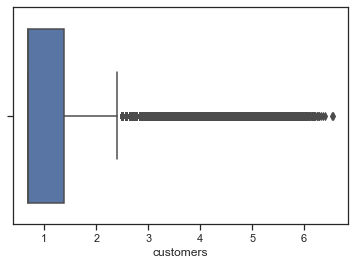

In [36]:
## Using box (Wiskers) plot
outl = sns.boxplot(df1.sample(n = 1000000)['customers'])

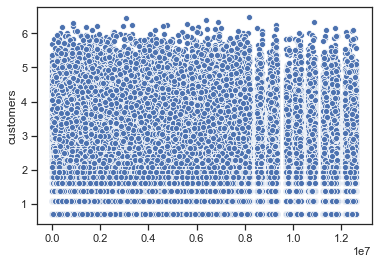

In [37]:
###  using scatterplots
sns.scatterplot(x=df1.sample(n = 1000000).index,y=df1.sample(n = 1000000)['customers'])

### price

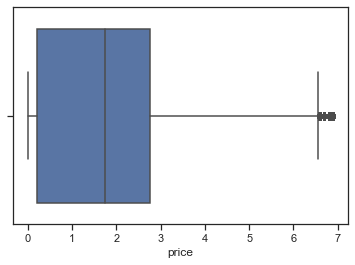

In [43]:
## Using box (Wiskers) plot
outl = sns.boxplot(df1.sample(n = 1000000)['price'])

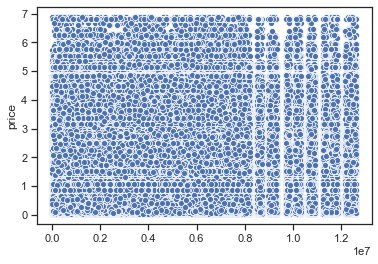

In [44]:
sns.scatterplot(x=df1.sample(n = 1000000).index,y=df1.sample(n = 1000000)['price'])

### tranq

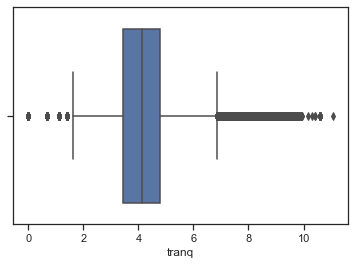

In [45]:
## Using box (Wiskers) plot
outl = sns.boxplot(df1.sample(n = 1000000)['tranq'])

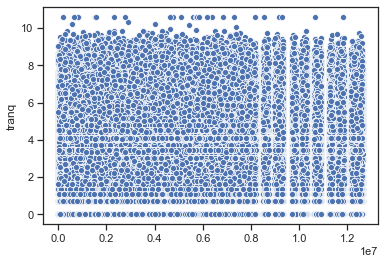

In [46]:
sns.scatterplot(x=df1.sample(n = 1000000).index,y=df1.sample(n = 1000000)['tranq'])